<h1>
<center>Navid Bahadoran</center>
</h1>
<h1>
<center>Homework 12, due December 8th, 11:59pm</center>
</h1>

<h2>
<center>Nov 24, 2023</center>
</h2>
1. The file map_24x32.csv from Canvas is a 24 × 32 map of an environment,
with walls marked as negative numbers and a reward marked as 1. The entries with
non-negative values are the valid locations (states) for the agent position. The agent’s
actions are to move from a valid location to a valid adjacent location (left, right, up or
down).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import pandas as pd
from pathlib import Path

In [2]:
# Load the map from the CSV file
map_24x32_path=Path(r'D:/Pycharm/Courses/STA5635/HW12/map_24x32.csv')
map_data = np.genfromtxt(map_24x32_path, delimiter=',')

**a) Implement the value iteration algorithm for learning the optimal policy for this
map, with $\lambda=0.9$. Initialize $V(s)$ with the given map values at all valid locations.
Run the value iteration for a maximum of 50 epochs of going through all
states $s\in S$. Display the initial $V(s)$ and the obtained $V(s)$ every 5 epochs, as
grayscale images of size 24 × 32. (5 points)**

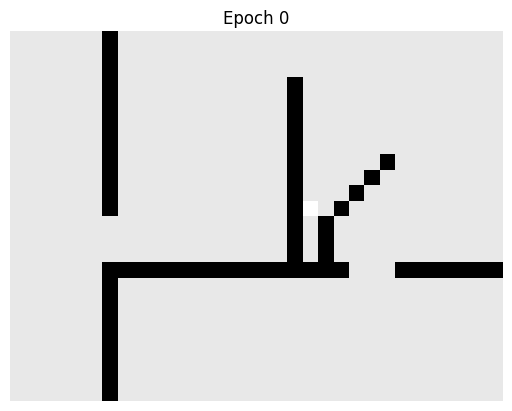

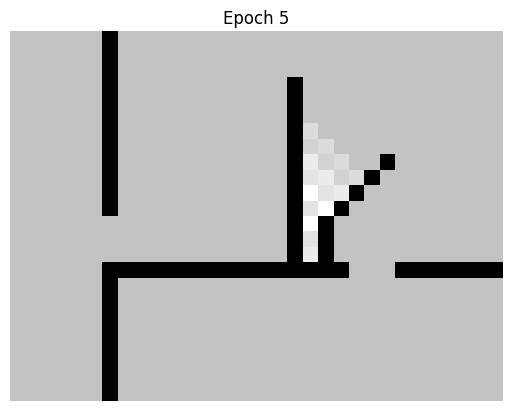

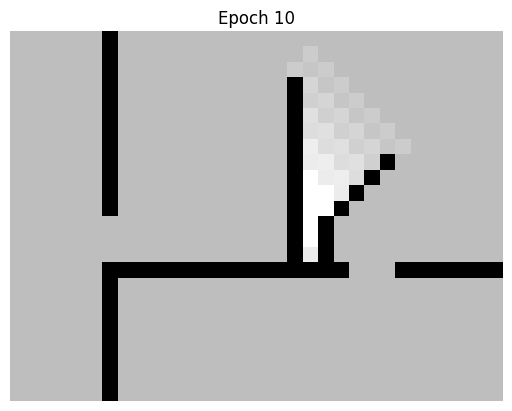

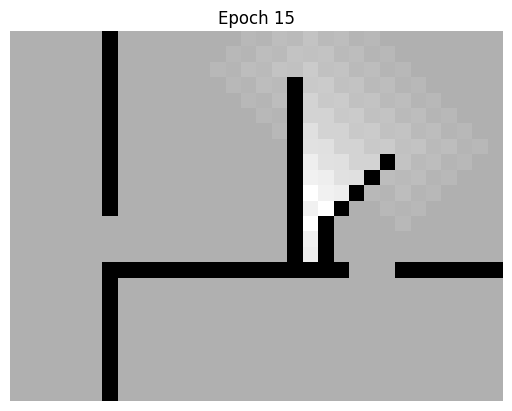

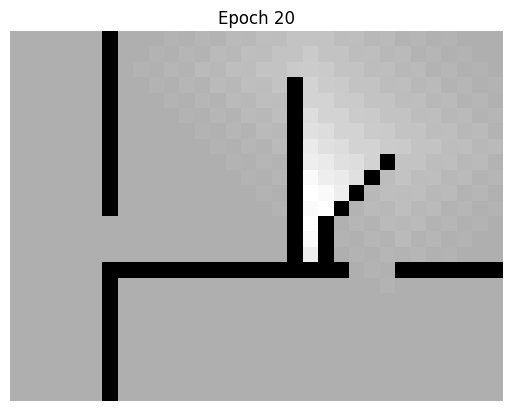

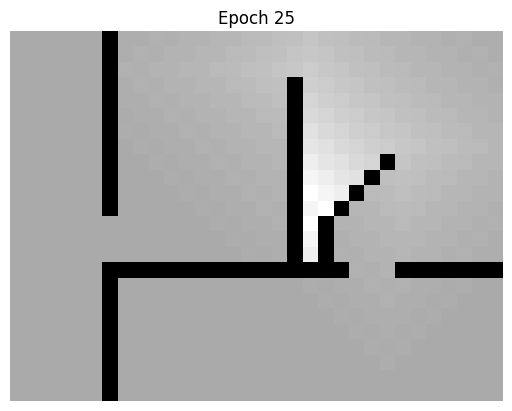

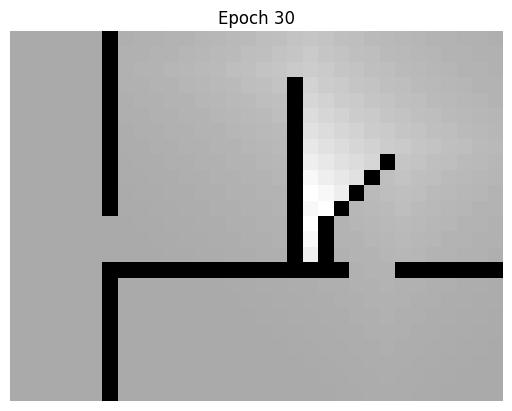

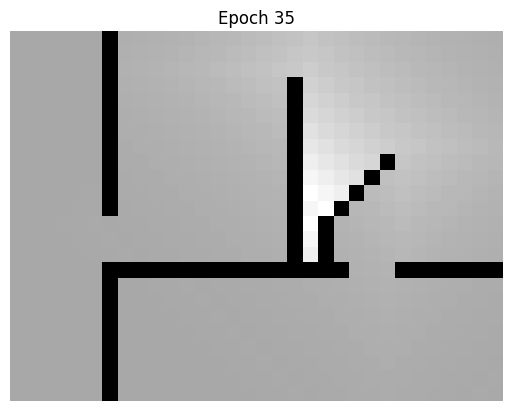

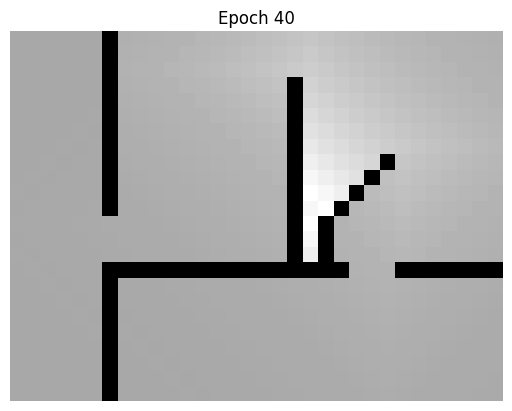

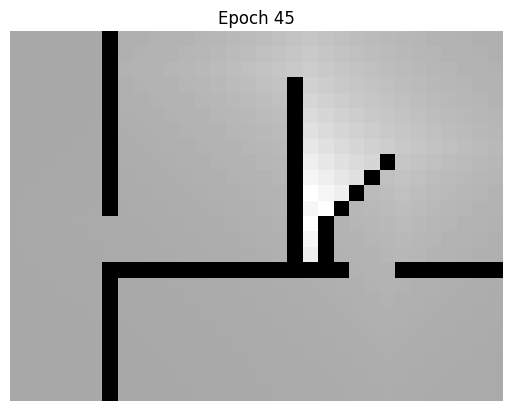

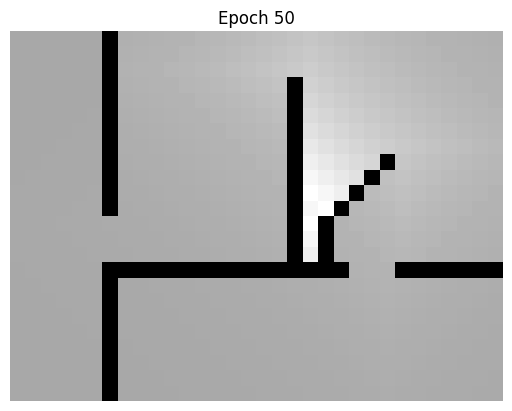

In [3]:
# Define parameters
gamma = 0.9
max_epochs = 50

# Get valid locations
valid_locations = np.where(map_data >= 0)

# Initialize V(s) with the given map values at all valid locations
V = map_data.copy()
# new_V= np.zeros_like(map_data).astype(float)
plt.imshow(V, cmap='gray')
plt.title(f'Epoch {0}')
plt.axis('off')
plt.show()
# Define function to get valid neighbors
def get_valid_neighbors(row, col):
    neighbors = []
    for i, j in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
        new_row, new_col = row + i, col + j
        if 0 <= new_row < map_data.shape[0] and 0 <= new_col < map_data.shape[1] and map_data[new_row, new_col] >= 0:
            neighbors.append((new_row, new_col))
    return neighbors

# Value iteration
for epoch in range(1, max_epochs + 1):
    new_V=V.copy()
    for row, col in zip(*valid_locations):
        neighbors = get_valid_neighbors(row, col)
        val=[]
        if neighbors:
            for cooridinate in neighbors:
                val.append(map_data[cooridinate] +gamma*V[cooridinate])
            new_V[row,col]=max(val)

    V = new_V
    # Display the V(s) every 5 epochs
    if epoch % 5 == 0:
        plt.imshow(V, cmap='gray')
        plt.title(f'Epoch {epoch}')
        plt.axis('off')
        plt.show()



**b)Display the final learned policy as a table with the actions at each valid location
encoded as L,R,U,D as left, right, up and down respectively. (4 points)**

In [4]:
policy = np.empty_like(map_data, dtype='str')
for row, col in zip(*valid_locations):
    neighbors = get_valid_neighbors(row, col)
    val=[]
    if neighbors:
        for cooridinate in neighbors:
            val.append(map_data[cooridinate] +gamma*V[cooridinate])
    best_action=neighbors[val.index(max(val))]
    best_action_move=(best_action[0]-row,best_action[1]-col)
    action = {
        (-1, 0): 'U',
        (1, 0): 'D',
        (0, -1): 'L',
        (0, 1): 'R'
    }[best_action_move]
    policy[row, col] = action
print("Final Learned Policy:")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None) 
pd.DataFrame(policy)

Final Learned Policy:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,D,D,D,D,D,D,,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D
1,D,D,D,D,D,D,,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D,D
2,D,D,D,D,D,D,,R,R,R,R,R,R,R,R,R,R,R,R,D,D,D,D,D,D,D,D,D,D,D,D,D
3,D,D,D,D,D,D,,U,U,U,U,U,U,U,U,U,U,U,,D,D,D,D,D,D,D,D,D,D,D,D,D
4,D,D,D,D,D,D,,U,U,U,U,U,U,U,U,U,U,U,,D,D,D,D,D,D,D,D,D,D,D,D,D
5,D,D,D,D,D,D,,U,U,U,U,U,U,U,U,U,U,U,,D,D,D,D,D,D,D,D,D,D,D,D,D
6,D,D,D,D,D,D,,U,U,U,U,U,U,U,U,U,U,U,,D,D,D,D,D,D,D,D,D,D,D,D,D
7,D,D,D,D,D,D,,U,U,U,U,U,U,U,U,U,U,U,,D,D,D,D,D,L,L,L,L,L,L,L,L
8,D,D,D,D,D,D,,U,U,U,U,U,U,U,U,U,U,U,,D,D,D,D,L,,U,U,U,U,U,U,U
9,D,D,D,D,D,D,,U,U,U,U,U,U,U,U,U,U,U,,D,D,D,L,,R,U,U,U,U,U,U,U
